In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error



<h1>Import and filter data </h1>

In [14]:
youtube = pd.read_csv("youtube-data/USvideos.csv")
delete = []
for (comments, ratings, index) in zip(youtube.comments_disabled, youtube.ratings_disabled, youtube.index):
    if comments or ratings:
        delete.append(index)
youtube = youtube.drop(delete)

y = np.array(youtube.views).transpose()
x = np.array(youtube[['likes', 'dislikes', 'comment_count']])

<h1>Create label and training sets</h1>

In [15]:
y = np.array(youtube.views).transpose()
x = np.array(youtube[['likes', 'dislikes', 'comment_count']])

<h1>Allocate 80% as training data and 20% as test data</h1>

In [16]:
y_train = y[:int(len(y)*0.8)]
y_test = y[len(y_train):]
x_train = x[:int(len(x)*0.8)]
x_test = x[len(x_train):]

<h1> Hyperparameter tuning </h1>

In [19]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=500,num=5)]
max_depth = [int(x) for x in np.linspace(10,100,num=10)]

hyperparam = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'bootstrap': [True]}

reg = RandomForestRegressor()
gsv = GridSearchCV(reg,hyperparam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
gsv.fit(x_train, y_train)
print("Best HyperParameter: ",gsv.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best HyperParameter:  {'bootstrap': True, 'max_depth': 10, 'n_estimators': 100}


<h1>Generate predictions</h1>

In [20]:
# predicting the  test set results
y_pred = gsv.best_estimator_.predict(x_test)

<h1>Plot Results</h1>

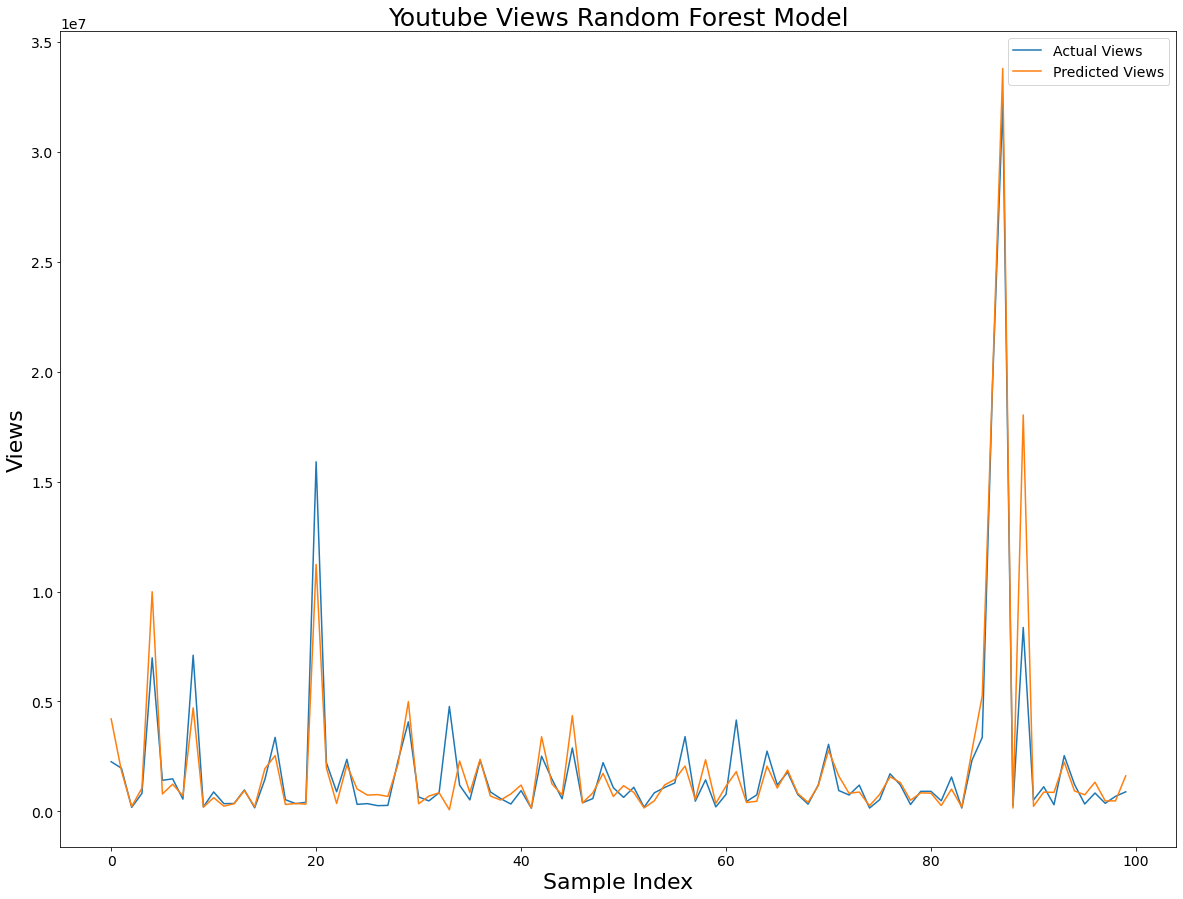

In [21]:
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', labelsize=22)    # fontsize of the x and y labels
plt.rc('figure', titlesize=25)  # fontsize of the figure title
plt.figure(figsize=(20,15))
plt.plot(range(0,100), y_test[:100])
plt.plot(range(0, 100), y_pred[:100])
plt.title("Youtube Views Random Forest Model", fontsize=25)
plt.xlabel("Sample Index")
plt.ylabel("Views")
plt.legend(["Actual Views", "Predicted Views"])
plt.show()

<h1>Calculate Root Mean Sqaured Error and R square score</h1>

In [22]:
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Root means score 5551293.27191
Variance score: 0.81
